# 0. Simulate phone dataset
## A

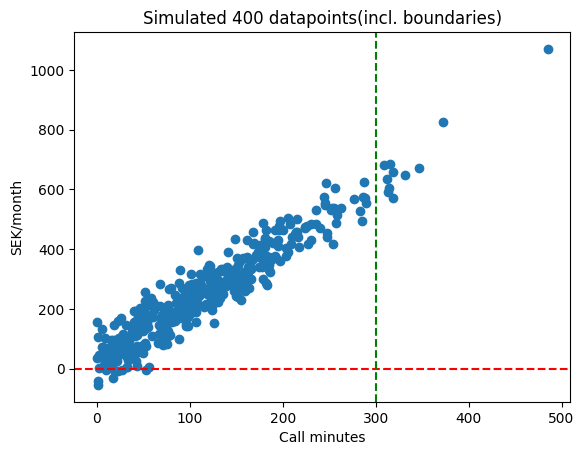

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = np.random.normal(100, 100, size=400) # normalfördelning

x = np.abs(x) # tar bort negativa nummer (absolutvärde)

epsilon = np.random.normal(0, 50, size=400)

y = 2*x + 25 + epsilon

plt.scatter(x, y)
plt.title("Simulated 400 datapoints(incl. boundaries)")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.axhline(y=0, color="red", linestyle="--")
plt.axvline(x=300, color="green", linestyle="--")

# B

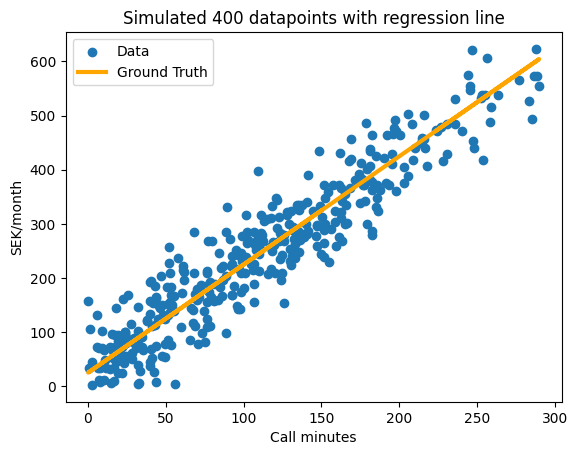

In [164]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.normal(100, 100, size=400) # normalfördelning

x = np.abs(x) # tar bort negativa nummer (absolutvärde)

epsilon = np.random.normal(0, 50, size=400)

y = 2*x + 25 + epsilon

# Tar bort punkter över 300, och under 0
mask = (x < 300) & (y > 0)
x = x[mask]
y = y[mask]


plt.scatter(x, y)
plt.plot(x, 25 + 2 * x, color='orange', linewidth=3) # regressionslinje med sanna parametrar
plt.gca().legend(("Data", "Ground Truth")) # legend uppe i vänstra hörnet
plt.title("Simulated 400 datapoints with regression line")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.show()


In [165]:
df = pd.DataFrame({'x': x, 'y': y})
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,381.0,110.608181,70.695220,0.252936,49.652435,106.428002,161.167629,289.679298
y,381.0,246.203236,143.270223,2.706290,137.119904,241.306311,335.261498,623.193172


# 1. Train | test split

## Riktig funktion enligt code-along

In [166]:
df_X = df["x"]
df_y = df["y"]

def train_test_split_func(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float, random_state: int, replace: bool) -> tuple:
    
    # Bestämmer andel procent training data
    train_fraction = int(len(X) * train_fraction)

    # plockar ut sample training data
    X_sample_train = X.sample(n= train_fraction, random_state=random_state, replace=replace)
    y_sample_train = y.sample(n= train_fraction, random_state=random_state, replace=replace)

    # Plockar ut sample test data
    X_sample_test = X.drop(X_sample_train.index)
    y_sample_test = y.drop(y_sample_train.index)

    # Skapar nya dataframes med training-, och test-data
    X_train, y_train = pd.DataFrame(X_sample_train), X_sample_test
    X_test, y_test = pd.DataFrame(y_sample_train), y_sample_test

    X_train.insert(0, "Intercept", 1)
    X_test.insert(0, "Intercept", 1)

    return (X_train, y_train, X_test, y_test)


In [167]:
# X_train, X_test, y_train, y_test = train_test_split_func(df_X, df_y, train_fraction=0.7, random_state=42, replace=False)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [169]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
np.to_numpy(df_X)

AttributeError: module 'numpy' has no attribute 'to_numpy'

## Linear regression from scratch

In [ ]:
regression_fit = lambda X, y: np.linalg.inv(X.T@X) @ X.T @ y
beta_hat = regression_fit(X_train, y_train) # skapar våra beta_hat 

# Plockar ut beta_hat_0 och beta_hat_1 från df
beta_hat_0 = beta_hat['y'][0]
beta_hat_1 = beta_hat['y'][1]

predict = lambda X, weights: X @ weights
# Regressions uträkning med en lambda funktion
regression_line = lambda x, b0, b1: b0 + (b1*x)

reg_line = regression_line(X_train, beta_hat_0, beta_hat_1)

plt.figure(figsize=(12,4))
plt.scatter(X_train, y_train)
plt.plot(X_train, 25 + 2 * X_train, color='green', linewidth=2) # ground truth
plt.plot(X_train, reg_line['x'], color='red', linewidth=2) # regression line

# Vet inte vaför det är en röd linje i x-axeln

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

## Linear regression with sklearn

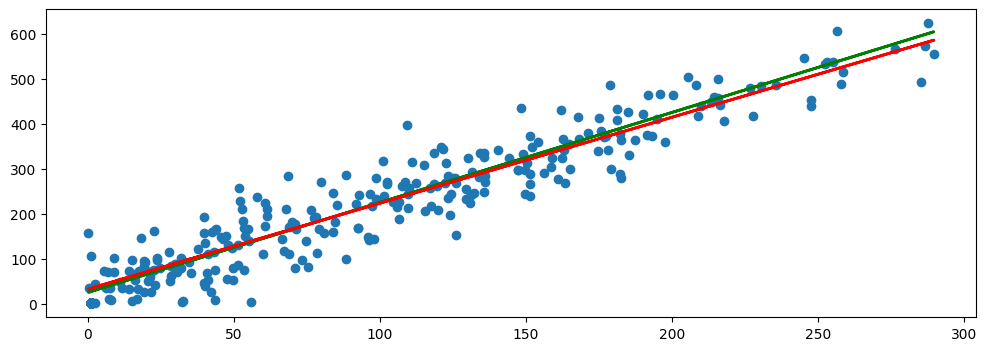

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=(12,4))
plt.scatter(X_train, y_train)
plt.plot(X_train, 25 + 2 * X_train, color='green', linewidth=2) # ground truth
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2) # regression line


In [ ]:
# Har problem med shapes, undrar om det blev fel från första början och måste börja om?
# kolla över train|test funktionen och se ifall det är korrekt, vet inte om det är de

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_X, y, test_size=0.33, random_state=42)

In [196]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# X_train = np.reshape(X_train (-1, 1))
X_train = np.reshape(X_train(0, 2))

TypeError: 'numpy.ndarray' object is not callable

In [178]:
X_train.shape

(85, 3)

# 3.

In [ ]:
predict = lambda X, weights: X @ weights

# Repshape:a? varför?
# är shapsen korrekt eller inte? varför ska dem se ut som dem gör?